In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('C:/Users/user/OneDrive/Codes/ML/datasets/titanic_train.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


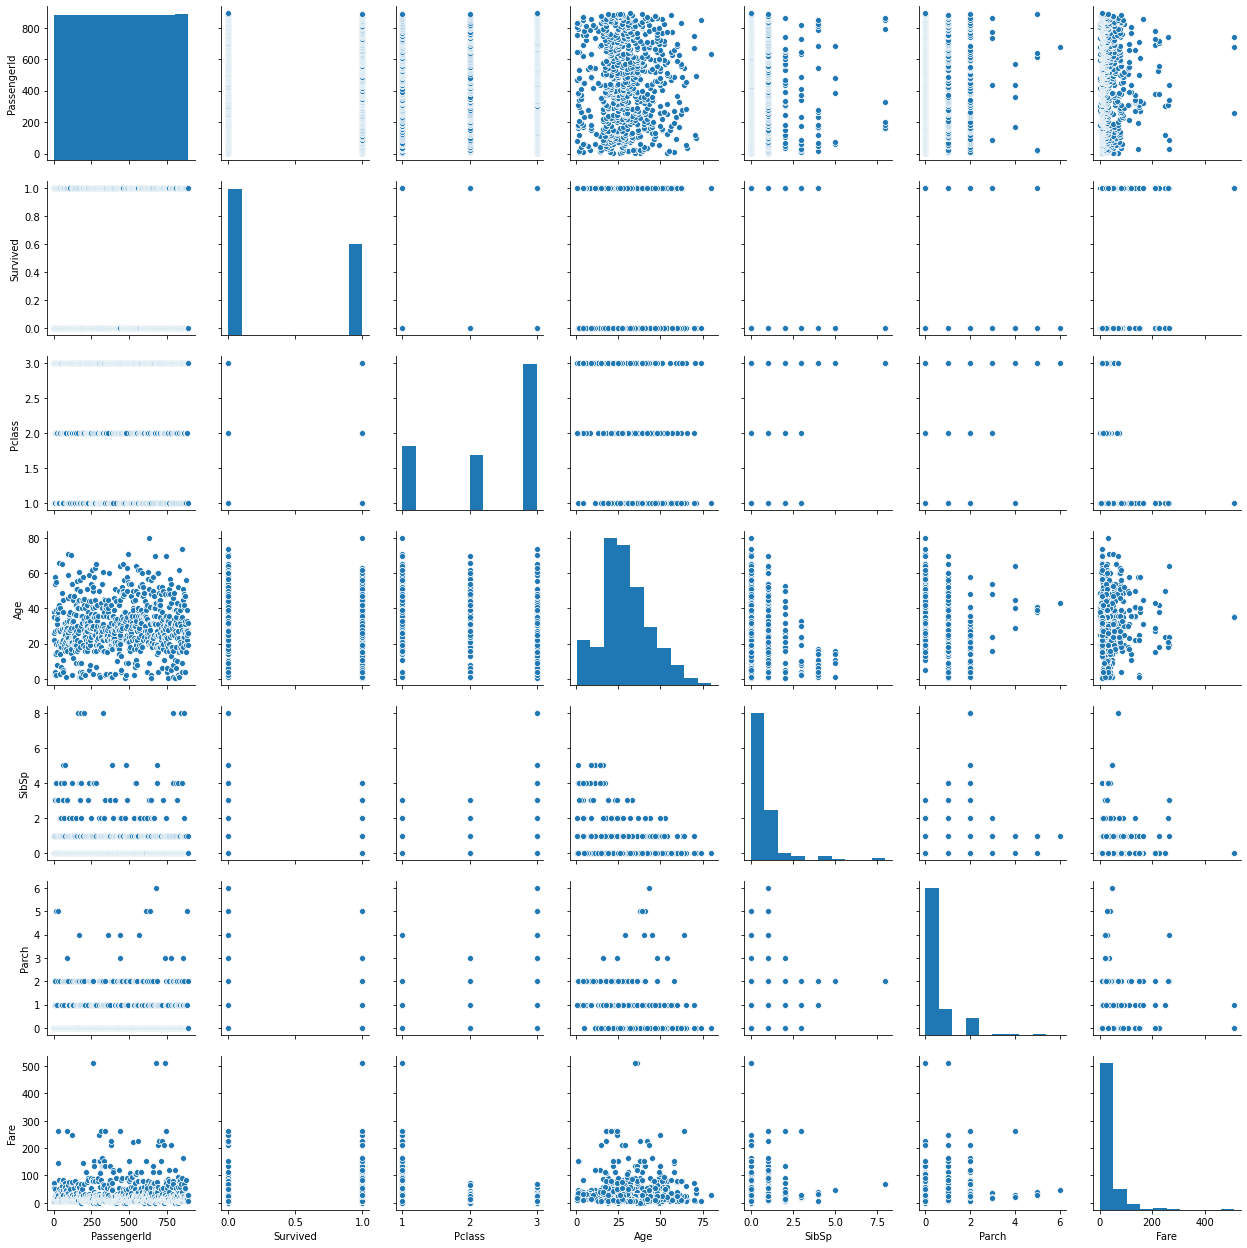

In [9]:
sns.pairplot(train_data)

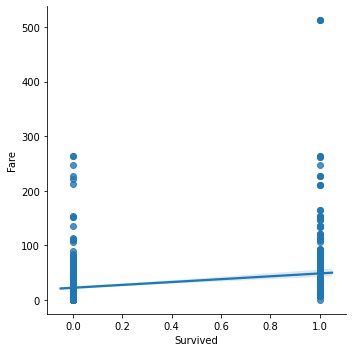

In [10]:
sns.lmplot(x='Survived', y='Fare', data=train_data)

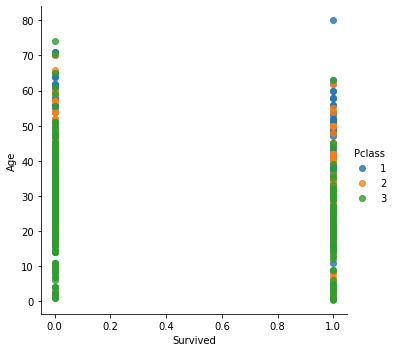

In [11]:
# Scatterplot arguments
sns.lmplot(x='Survived', y='Age', data=train_data,
           fit_reg=False, # No regression line
           hue='Pclass')   # Color by evolution stage

In [12]:
# Filling NaN == 0
train_data = train_data.fillna(0)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
# Dropping target variable

X_train = train_data.drop(['Survived'], axis=1)
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
y_train = train_data['Survived']
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
# Mean Encoding on Cabin,Embarked
# taking the mean of the classes with
#  respect to the target classes

Cabin_mean=train_data.groupby("Cabin")["Survived"].mean()

In [17]:
X_train.loc[:,"Cabin_mean"]=X_train.loc[:,"Cabin"].map(Cabin_mean)

In [19]:
embarked_mean=train_data.groupby("Embarked")["Survived"].mean()
embarked_mean

Embarked
0    1.000000
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [20]:
X_train.loc[:,'Embarked_mean']=X_train.loc[:,'Embarked'].map(embarked_mean)

In [21]:
# Dropping Primary Key vcolumns Names,Ticket, etc

X_train = X_train.drop(['PassengerId', 'Name', 'Ticket', 'Embarked', 'Cabin'], axis=1)

In [22]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_mean,Embarked_mean
0,3,male,22.0,1,0,7.2500,0.299854,0.336957
1,1,female,38.0,1,0,71.2833,1.000000,0.553571
2,3,female,26.0,0,0,7.9250,0.299854,0.336957
3,1,female,35.0,1,0,53.1000,0.500000,0.336957
4,3,male,35.0,0,0,8.0500,0.299854,0.336957
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,0.299854,0.336957
887,1,female,19.0,0,0,30.0000,1.000000,0.336957
888,3,female,0.0,1,2,23.4500,0.299854,0.336957
889,1,male,26.0,0,0,30.0000,1.000000,0.553571


In [23]:
gender = {'male': 1, 'female': 0}
X_train['Sex'] = [gender[item] for item in X_train['Sex']]

In [24]:
X_train['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [25]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_mean,Embarked_mean
0,3,1,22.0,1,0,7.2500,0.299854,0.336957
1,1,0,38.0,1,0,71.2833,1.000000,0.553571
2,3,0,26.0,0,0,7.9250,0.299854,0.336957
3,1,0,35.0,1,0,53.1000,0.500000,0.336957
4,3,1,35.0,0,0,8.0500,0.299854,0.336957
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0.299854,0.336957
887,1,0,19.0,0,0,30.0000,1.000000,0.336957
888,3,0,0.0,1,2,23.4500,0.299854,0.336957
889,1,1,26.0,0,0,30.0000,1.000000,0.553571


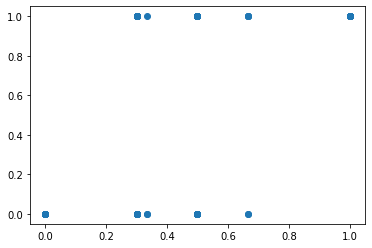

In [26]:
plt.scatter(X_train['Cabin_mean'], y_train)

# Making a duplicate

In [27]:
x_tra = X_train.copy()
x_tra

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_mean,Embarked_mean
0,3,1,22.0,1,0,7.2500,0.299854,0.336957
1,1,0,38.0,1,0,71.2833,1.000000,0.553571
2,3,0,26.0,0,0,7.9250,0.299854,0.336957
3,1,0,35.0,1,0,53.1000,0.500000,0.336957
4,3,1,35.0,0,0,8.0500,0.299854,0.336957
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0.299854,0.336957
887,1,0,19.0,0,0,30.0000,1.000000,0.336957
888,3,0,0.0,1,2,23.4500,0.299854,0.336957
889,1,1,26.0,0,0,30.0000,1.000000,0.553571


In [28]:
y_tra = y_train.copy()
y_tra

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

X_train_, X_test_, y_train_ ,y_test_ = train_test_split(x_tra, y_tra, test_size=0.2, random_state=42)

print(X_train_.shape)
print(X_test_.shape)
print(y_train_.shape)
print(y_test_.shape)

(712, 8)
(179, 8)
(712,)
(179,)


In [31]:
from sklearn.linear_model import LogisticRegression

logModel = LogisticRegression()

In [32]:
logModel.fit(X_train_, y_train_)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = logModel.predict(X_test_)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_pred, y_test_) * 100

In [36]:
round(acc,2)

84.92

In [37]:
# Combining dataframes

train_data_ = pd.DataFrame(X_test_)

In [38]:
train_data_ = train_data_.join(y_test_)

In [39]:
train_data_

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_mean,Embarked_mean,Survived
709,3,1,0.0,1,1,15.2458,0.299854,0.553571,1
439,2,1,31.0,0,0,10.5000,0.299854,0.336957,0
840,3,1,20.0,0,0,7.9250,0.299854,0.336957,0
720,2,0,6.0,0,1,33.0000,0.299854,0.336957,1
39,3,0,14.0,1,0,11.2417,0.299854,0.553571,1
...,...,...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,0.299854,0.336957,0
773,3,1,0.0,0,0,7.2250,0.299854,0.553571,0
25,3,0,38.0,1,5,31.3875,0.299854,0.336957,1
84,2,0,17.0,0,0,10.5000,0.299854,0.336957,1


In [40]:
train_data_.reset_index(level=0, inplace=True)

In [42]:
y_pred = pd.DataFrame(y_pred, index=None)
y_pred

,0
0,0
1,0
2,0
3,1
4,1
...,...
174,0
175,0
176,0
177,1


In [43]:
train_data_ = pd.concat([train_data_, y_pred], axis=1)

In [44]:
train_data_.rename(columns = {0: 'Y_pred'}, inplace=True)
train_data_

,index,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_mean,Embarked_mean,Survived,Y_pred
0,709,3,1,0.0,1,1,15.2458,0.299854,0.553571,1,0
1,439,2,1,31.0,0,0,10.5000,0.299854,0.336957,0,0
2,840,3,1,20.0,0,0,7.9250,0.299854,0.336957,0,0
3,720,2,0,6.0,0,1,33.0000,0.299854,0.336957,1,1
4,39,3,0,14.0,1,0,11.2417,0.299854,0.553571,1,1
...,...,...,...,...,...,...,...,...,...,...,...
174,433,3,1,17.0,0,0,7.1250,0.299854,0.336957,0,0
175,773,3,1,0.0,0,0,7.2250,0.299854,0.553571,0,0
176,25,3,0,38.0,1,5,31.3875,0.299854,0.336957,1,0
177,84,2,0,17.0,0,0,10.5000,0.299854,0.336957,1,1


In [69]:
# Working on test data 

test_data = pd.read_csv('C:/Users/user/OneDrive/Codes/ML/datasets/titanic_test.csv')

In [70]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [72]:
test_data = test_data.fillna(0)

In [73]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [74]:
# Changing the column 'Sex' to 0 & 1

In [75]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test_data['Sex'] = le.fit_transform(test_data['Sex'])

In [76]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,S


In [77]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [78]:
# Mean of Cabin,Embarked with 
# respect to target variable
# will fetch train_data

test_data.loc[:,'Cabin_mean'] = test_data.loc[:, 'Cabin'].map(Cabin_mean)

In [79]:
test_data.loc[:, 'Embarked_mean'] = test_data.loc[:, 'Embarked'].map(embarked_mean)

In [80]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_mean,Embarked_mean
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,Q,0.299854,0.389610
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,S,0.299854,0.336957
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,Q,0.299854,0.389610
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,S,0.299854,0.336957
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,S,0.299854,0.336957


In [81]:
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_mean,Embarked_mean
0,3,1,34.5,0,0,7.8292,0.299854,0.389610
1,3,0,47.0,1,0,7.0000,0.299854,0.336957
2,2,1,62.0,0,0,9.6875,0.299854,0.389610
3,3,1,27.0,0,0,8.6625,0.299854,0.336957
4,3,0,22.0,1,1,12.2875,0.299854,0.336957
...,...,...,...,...,...,...,...,...
413,3,1,0.0,0,0,8.0500,0.299854,0.336957
414,1,0,39.0,0,0,108.9000,NaN,0.553571
415,3,1,38.5,0,0,7.2500,0.299854,0.336957
416,3,1,0.0,0,0,8.0500,0.299854,0.336957


In [82]:
test_data.fillna(0, inplace=True)

In [83]:
y_pred_ = logModel.predict(test_data)
y_pred_

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [84]:
y_pred_ = pd.DataFrame(y_pred_, index=None)
test_data = pd.concat([test_data, y_pred_], axis=1)

In [88]:
test_data = test_data.rename(columns={0: 'Predicted_Survived'})

In [89]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_mean,Embarked_mean,Predicted_Survived
0,3,1,34.5,0,0,7.8292,0.299854,0.389610,0
1,3,0,47.0,1,0,7.0000,0.299854,0.336957,0
2,2,1,62.0,0,0,9.6875,0.299854,0.389610,0
3,3,1,27.0,0,0,8.6625,0.299854,0.336957,0
4,3,0,22.0,1,1,12.2875,0.299854,0.336957,1
...,...,...,...,...,...,...,...,...,...
413,3,1,0.0,0,0,8.0500,0.299854,0.336957,0
414,1,0,39.0,0,0,108.9000,0.000000,0.553571,1
415,3,1,38.5,0,0,7.2500,0.299854,0.336957,0
416,3,1,0.0,0,0,8.0500,0.299854,0.336957,0


In [93]:
survival_per = round(test_data.groupby('Pclass')['Predicted_Survived'].mean() * 100, 2)
print(survival_per)

Pclass
1    53.27
2    34.41
3    29.82
Name: Predicted_Survived, dtype: float64
